# Financial Analysis with Data Science & Machine Learning - Part 1
## Data Loading and Exploration

This notebook performs the initial data loading and exploratory analysis of financial indicators for US stocks.

## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# Set visualization style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Download the dataset using kagglehub
path = kagglehub.dataset_download("cnic92/200-financial-indicators-of-us-stocks-20142018")
print("Path to dataset files:", path)

  0%|          | 0.00/14.8M [00:00<?, ?B/s]

  7%|▋         | 1.00M/14.8M [00:00<00:13, 1.08MB/s]

 13%|█▎        | 2.00M/14.8M [00:01<00:12, 1.12MB/s]

 20%|██        | 3.00M/14.8M [00:02<00:10, 1.13MB/s]

 27%|██▋       | 4.00M/14.8M [00:03<00:09, 1.14MB/s]

 34%|███▎      | 5.00M/14.8M [00:04<00:08, 1.15MB/s]

 40%|████      | 6.00M/14.8M [00:05<00:08, 1.11MB/s]

 47%|████▋     | 7.00M/14.8M [00:06<00:07, 1.12MB/s]

 54%|█████▍    | 8.00M/14.8M [00:07<00:06, 1.13MB/s]

 61%|██████    | 9.00M/14.8M [00:08<00:05, 1.14MB/s]

 67%|██████▋   | 10.0M/14.8M [00:09<00:04, 1.14MB/s]

 74%|███████▍  | 11.0M/14.8M [00:10<00:03, 1.14MB/s]

 81%|████████  | 12.0M/14.8M [00:11<00:02, 1.10MB/s]

 88%|████████▊ | 13.0M/14.8M [00:12<00:01, 1.10MB/s]

 94%|█████████▍| 14.0M/14.8M [00:13<00:00, 1.11MB/s]

100%|██████████| 14.8M/14.8M [00:13<00:00, 1.13MB/s]

100%|██████████| 14.8M/14.8M [00:13<00:00, 1.13MB/s]

Extracting files...


Path to dataset files: C:\Users\ELAZZOUTISalaheddine\.cache\kagglehub\datasets\cnic92\200-financial-indicators-of-us-stocks-20142018\versions\1


In [3]:
# List all files in the downloaded dataset
data_files = os.listdir(path)
print("Files in the dataset:")
for file in data_files:
    print(f"- {file}")

Files in the dataset:
- 2014_Financial_Data.csv
- 2015_Financial_Data.csv
- 2016_Financial_Data.csv
- 2017_Financial_Data.csv
- 2018_Financial_Data.csv


In [4]:
# Load the dataset (assuming CSV format, adjust if needed)
# Try to find the main data file
csv_files = [f for f in data_files if f.endswith('.csv')]
if csv_files:
    main_file = os.path.join(path, csv_files[0])
    data = pd.read_csv(main_file)
    print(f"Loaded data from {csv_files[0]}")
else:
    print("No CSV files found. Please check the dataset structure.")
    # Alternative: try to directly access a known file if the structure is known
    # data = pd.read_csv(os.path.join(path, 'financial_data.csv'))

Loaded data from 2014_Financial_Data.csv


## 2. Initial Data Exploration

In [5]:
# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nFirst 5 rows of the dataset:")
data.head()

Dataset shape: (3808, 225)

First 5 rows of the dataset:


,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per S

In [6]:
# Data types and missing values
print("\nData types:")
data.info()


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

# Display columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
if not missing_df.empty:
    print("\nColumns with missing values:")
    missing_df
else:
    print("\nNo missing values found in the dataset.")


Columns with missing values:


In [8]:
# Statistical summary of numerical features
print("\nStatistical summary of numerical features:")
data.describe()


Statistical summary of numerical features:


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Op

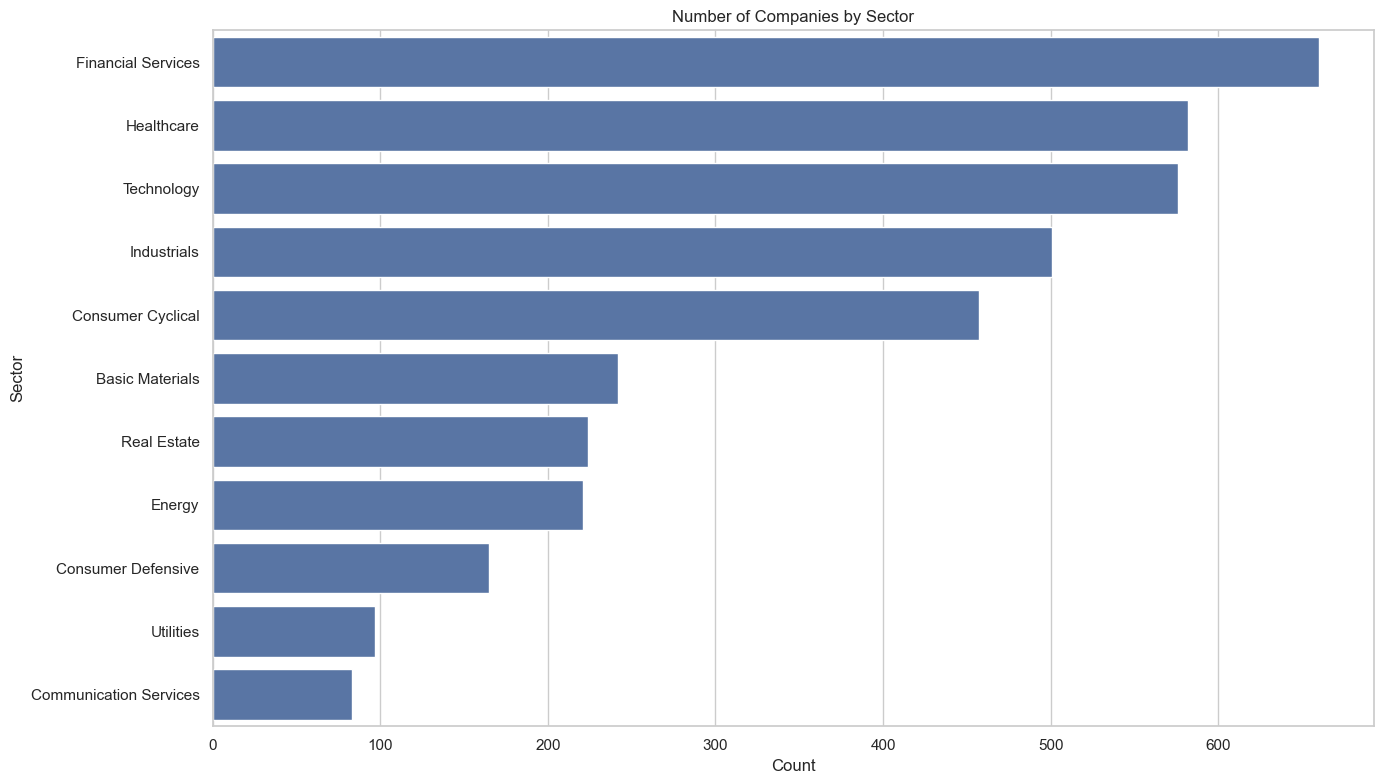


Company count by sector:
Sector
Financial Services        660
Healthcare                582
Technology                576
Industrials               501
Consumer Cyclical         457
Basic Materials           242
Real Estate               224
Energy                    221
Consumer Defensive        165
Utilities                  97
Communication Services     83
Name: count, dtype: int64


In [9]:
# Count of companies by sector
if 'Sector' in data.columns:
    plt.figure(figsize=(14, 8))
    sector_counts = data['Sector'].value_counts()
    sns.barplot(x=sector_counts.values, y=sector_counts.index)
    plt.title('Number of Companies by Sector')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()
    
    print("\nCompany count by sector:")
    print(sector_counts)

## 3. Handling Missing Values and Data Cleaning

In [10]:
# Function to identify and handle outliers
def handle_outliers(df, column, method='cap', threshold=3):
    """Handle outliers in a dataframe column
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe containing the column with outliers
    column : str
        The column name to check for outliers
    method : str, optional (default='cap')
        The method to handle outliers ('cap' or 'remove')
    threshold : float, optional (default=3)
        The z-score threshold to identify outliers
        
    Returns:
    --------
    pandas DataFrame
        Dataframe with handled outliers
    """
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Skip non-numeric columns
    if not np.issubdtype(df_clean[column].dtype, np.number):
        print(f"Column '{column}' is not numeric. Skipping.")
        return df_clean
    
    # Calculate z-scores
    z_scores = np.abs((df_clean[column] - df_clean[column].mean()) / df_clean[column].std())
    outliers = z_scores > threshold
    
    # Handle outliers based on the selected method
    if method == 'cap':
        # Cap outliers at the threshold value
        upper_bound = df_clean[column].mean() + threshold * df_clean[column].std()
        lower_bound = df_clean[column].mean() - threshold * df_clean[column].std()
        
        # Cap upper and lower bounds
        df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound
        df_clean.loc[df_clean[column] < lower_bound, column] = lower_bound
        
        print(f"Capped {outliers.sum()} outliers in '{column}'")
    elif method == 'remove':
        # Remove rows with outliers
        df_clean = df_clean[~outliers]
        print(f"Removed {outliers.sum()} outliers from '{column}'")
    
    return df_clean

In [11]:
# Clean the data - handle missing values
# Strategy depends on the actual data, but here's a generic approach
data_clean = data.copy()

# 1. Drop columns with too many missing values (e.g., >50%)
high_missing_cols = missing_df[missing_df['Percentage'] > 50].index.tolist()
if high_missing_cols:
    print(f"Dropping columns with >50% missing values: {high_missing_cols}")
    data_clean = data_clean.drop(columns=high_missing_cols)

# 2. Impute remaining missing values - numerical columns with median, categorical with mode
numeric_cols = data_clean.select_dtypes(include=np.number).columns
categorical_cols = data_clean.select_dtypes(exclude=np.number).columns

# For numeric columns: use median (more robust to outliers than mean)
for col in numeric_cols:
    if data_clean[col].isnull().sum() > 0:
        median_val = data_clean[col].median()
        data_clean[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val:.2f}")

# For categorical columns: use mode (most frequent value)
for col in categorical_cols:
    if data_clean[col].isnull().sum() > 0:
        mode_val = data_clean[col].mode()[0]
        data_clean[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

Dropping columns with >50% missing values: ['cashConversionCycle', 'operatingCycle', 'shortTermCoverageRatios']
Filled missing values in 'Revenue' with median: 434901000.00
Filled missing values in 'Revenue Growth' with median: 0.06
Filled missing values in 'Cost of Revenue' with median: 141442000.00
Filled missing values in 'Gross Profit' with median: 190876000.00
Filled missing values in 'R&D Expenses' with median: 0.00
Filled missing values in 'SG&A Expense' with median: 73818000.00
Filled missing values in 'Operating Expenses' with median: 138661000.00
Filled missing values in 'Operating Income' with median: 41044000.00
Filled missing values in 'Interest Expense' with median: 2563000.00
Filled missing values in 'Earnings before Tax' with median: 28427000.00
Filled missing values in 'Income Tax Expense' with median: 5335000.00
Filled missing values in 'Net Income - Non-Controlling int' with median: 0.00
Filled missing values in 'Net Income - Discontinued ops' with median: 0.00
Fille

C:\Users\ELAZZOUTISalaheddine\AppData\Local\Temp\ipykernel_20684\367515952.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean[col].fillna(median_val, inplace=True)


In [12]:
# Handle outliers in key financial metrics
key_metrics = ['Total Revenue', 'Gross Profit', 'Operating Income', 'Net Income', 
               'Total Assets', 'Total Liabilities', 'Equity', 'Cash and Cash Equivalents',
               'Earnings Per Share (EPS)', 'Price-to-Earnings Ratio (P/E)', 'Dividend Yield', 
               'Market Capitalization']

# Handle outliers for each key metric that exists in our data
for metric in key_metrics:
    if metric in data_clean.columns:
        data_clean = handle_outliers(data_clean, metric, method='cap', threshold=3)

Capped 36 outliers in 'Gross Profit'
Capped 34 outliers in 'Operating Income'
Capped 21 outliers in 'Net Income'
Capped 19 outliers in 'Dividend Yield'


In [13]:
# Save cleaned data for next notebooks
data_clean.to_csv('cleaned_financial_data.csv', index=False)
print("Saved cleaned data to 'cleaned_financial_data.csv'")

Saved cleaned data to 'cleaned_financial_data.csv'


## 4. Data Profile Summary

In [14]:
# Display summary of the cleaned dataset
print("Cleaned dataset shape:", data_clean.shape)
print(f"Original dataset had {data.shape[0]} rows and {data.shape[1]} columns")
print(f"Cleaned dataset has {data_clean.shape[0]} rows and {data_clean.shape[1]} columns")

# Check for any remaining missing values
remaining_missing = data_clean.isnull().sum().sum()
print(f"Remaining missing values: {remaining_missing}")

Cleaned dataset shape: (3808, 222)
Original dataset had 3808 rows and 225 columns
Cleaned dataset has 3808 rows and 222 columns
Remaining missing values: 0


## Next Steps

In the next notebook, we will:
1. Calculate financial ratios
2. Perform more detailed exploratory data analysis
3. Create visualizations to understand the relationships between financial variables